#  Bank_Personal_Loan_Modelling

## 1. Read the column description and ensure you understand each attribute well

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd # for creating dataframe
import matplotlib.pyplot as plt #plotting graphs
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split # for spllting train and test data
from sklearn import metrics #for creating confusion metrics
from sklearn.metrics import accuracy_score  # accuracy score
from sklearn.linear_model import LogisticRegression # for training Logistic Regression Model
from sklearn.naive_bayes import GaussianNB # for training Naive Bayes Model
from sklearn.neighbors import KNeighborsClassifier # for training KNN Model
from sklearn.metrics import roc_curve, auc
import pylab as pl

### Load and review Data

In [2]:
#Read data
bank_df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
bank_df.shape # No. of rows and columns

(5000, 14)

In [4]:
bank_df.columns # display columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
bank_df.dtypes  # data typres of all columns

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
bank_df.head() # first five records

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
bank_df=bank_df.drop(['ID','ZIP Code'],axis=1) #dropping ID and ZIP Code columns as they cannot establish the relationship with personal loan
bank_df.head() # first five records

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [8]:
#Changing 'Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard' variables to category variables
var=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
bank_df[var]=bank_df[var].astype('category')

In [9]:
bank_df.dtypes #updated data types of all variables

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [10]:
bank_df.isnull().values.any() # NULL value check

False

## 2. Study the data distribution in each attribute, share your findings

In [11]:
bank_df.describe() #description of all quantitative columns/fields

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


### Univariate Analysis

In [12]:
bank_df.apply(lambda x: len(x.unique()))# finding unique data

Age                    45
Experience             47
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

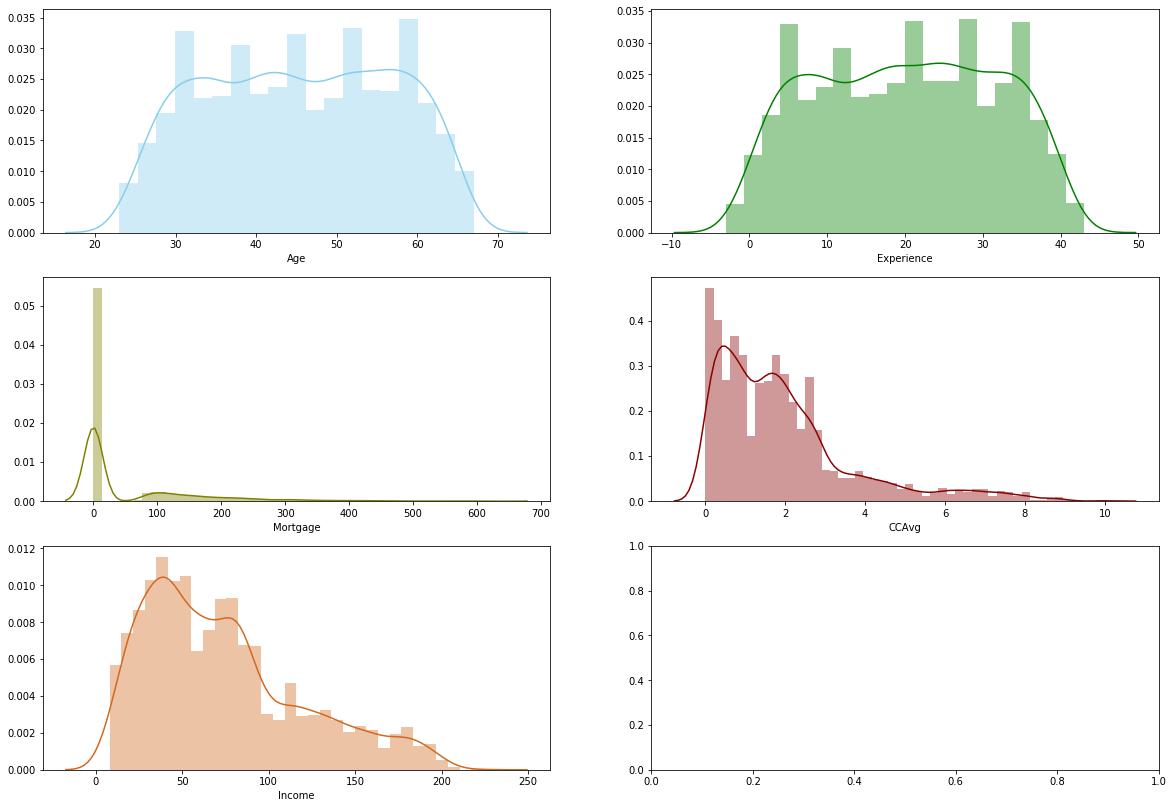

In [13]:
f, axes = plt.subplots(3,2, figsize=(20, 14), sharex=False)
sns.distplot( bank_df["Age"] , color="skyblue", ax=axes[0, 0]); # histogram plot for Age column
sns.distplot( bank_df["Experience"] , color="green", ax=axes[0, 1]); # histogram plot for Experience column
sns.distplot( bank_df["Mortgage"] , color="olive", ax=axes[1, 0]); # histogram plot for Mortgage column
sns.distplot( bank_df["CCAvg"] , color="darkred", ax=axes[1, 1]); # histogram plot for CCAvg column
sns.distplot( bank_df["Income"] , color="chocolate", ax=axes[2, 0]); # histogram plot for Income column

##### Age and Experience are normally distributed
##### Experience and age have very high correlation value, which is expected.
##### CCAvg is positively skewed
##### Income is also positively skewed

In [14]:
#Correlation between the variables
bank_corr=bank_df.corr()
print(bank_corr)

                 Age  Experience    Income     CCAvg  Mortgage
Age         1.000000    0.994215 -0.055269 -0.052012 -0.012539
Experience  0.994215    1.000000 -0.046574 -0.050077 -0.010582
Income     -0.055269   -0.046574  1.000000  0.645984  0.206806
CCAvg      -0.052012   -0.050077  0.645984  1.000000  0.109905
Mortgage   -0.012539   -0.010582  0.206806  0.109905  1.000000


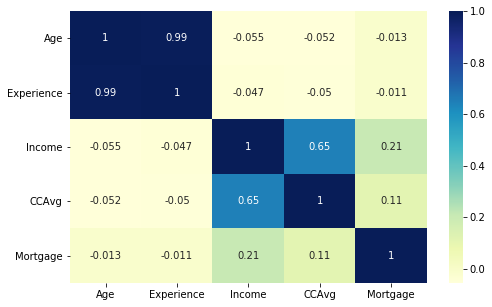

In [15]:
plt.subplots(figsize =(8, 5)) 
sns.heatmap(bank_corr,cmap="YlGnBu",annot=True);

#### Experience and age have very high correlation value, which is expected. 
#### Income and CCAvg spend also have a strong correlation value.

### Bivariate analysis

Family            1     2    3     4
Personal Loan                       
0              1365  1190  877  1088
1               107   106  133   134


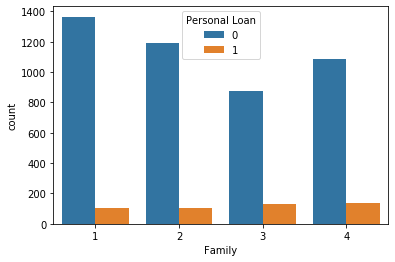

In [16]:
# Family
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='Family',aggfunc='size'))
sns.countplot(x='Family',data=bank_df,hue='Personal Loan');

###### There seems to be no major impact in personal loan, given the Family size . Families with size of 3 and 4 more likely to opt for personal loan. This analysis can be used in future campaign.

Education         1     2     3
Personal Loan                  
0              2003  1221  1296
1                93   182   205


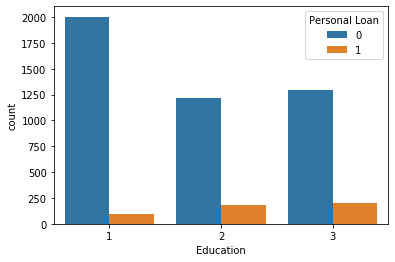

In [17]:
# Education
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='Education',aggfunc='size'))
sns.countplot(x='Education',data=bank_df,hue='Personal Loan');

##### Education level with 1 as value (Undergrad degree) have the highest number of personal loan acceptance

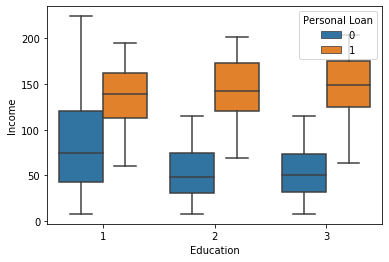

In [18]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=bank_df);

##### The customers whose education level 1 is having more income. However customers who have opted for personal loan have similar income.

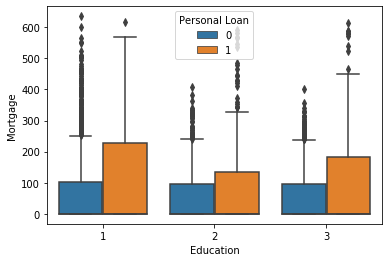

In [19]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=bank_df);

## 3. Get the target column distribution. Your comments

In [20]:
bank_df.groupby(['Personal Loan']).agg(['mean','median'])

Age        Experience             Income         \
                    mean median       mean median        mean median   
Personal Loan                                                          
0              45.367257     45  20.132301     20   66.237389   59.0   
1              45.066667     45  19.843750     20  144.745833  142.5   

                  CCAvg           Mortgage         
                   mean median        mean median  
Personal Loan                                      
0              1.729009    1.4   51.789381      0  
1              3.905354    3.8  100.845833      0

In [21]:
bank_df.groupby(['Personal Loan']).agg(['min','max'])

Age     Experience     Income      CCAvg       Mortgage     
              min max        min max    min  max   min   max      min  max
Personal Loan                                                             
0              23  67         -3  43      8  224   0.0   8.8        0  635
1              26  65          0  41     60  203   0.0  10.0        0  617

0    4520
1     480
Name: Personal Loan, dtype: int64


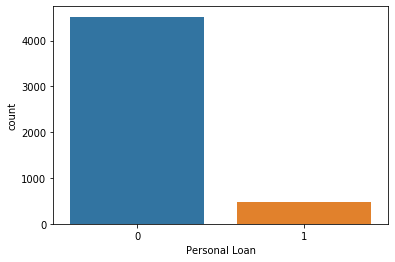

In [22]:
#Personal Loan
print(bank_df['Personal Loan'].value_counts())
sns.countplot(x='Personal Loan',data=bank_df);

##### According to the data, only 9.6% of customers out of 5000 opted for personal loan

Securities Account     0    1
Personal Loan                
0                   4058  462
1                    420   60


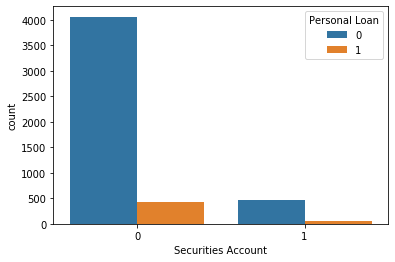

In [23]:
#Securities Account
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='Securities Account',aggfunc='size'))
sns.countplot(x='Securities Account',data=bank_df,hue='Personal Loan');

##### Customers with no securities Account with the bank have higher number of personal loan acceptance. i.e. Most of customers who do not opt for Personal Loan have securities account.

CD Account        0    1
Personal Loan           
0              4358  162
1               340  140


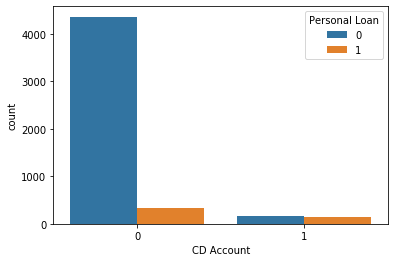

In [24]:
#CD Account
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='CD Account',aggfunc='size'))
sns.countplot(x='CD Account',data=bank_df,hue='Personal Loan');

##### Customers not having Certificate of Deposit (CD) account, don't opt for Personal Loan. Most of the customers having customers having Certificate of Deposit (CD) account have opted for Personal loan.

Online            0     1
Personal Loan            
0              1827  2693
1               189   291


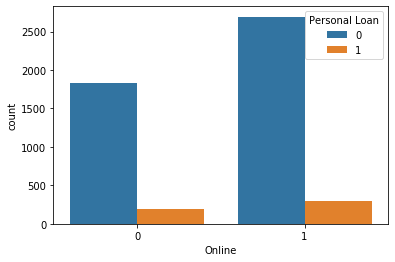

In [25]:
#Online
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='Online',aggfunc='size'))
sns.countplot(x='Online',data=bank_df,hue='Personal Loan');

##### Customers using internet banking facilities have higher number of personal loan acceptance.

CreditCard        0     1
Personal Loan            
0              3193  1327
1               337   143


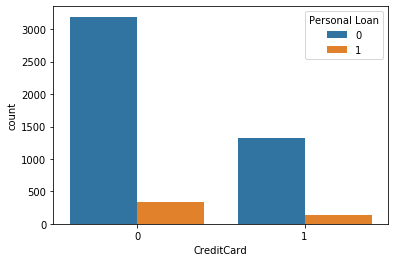

In [26]:
#CreditCard
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='CreditCard',aggfunc='size'))
sns.countplot(x='CreditCard',data=bank_df,hue='Personal Loan');

##### Customers not having Credit Cards have highernumber for Personal Loan acceptance than customers having Credit Card.

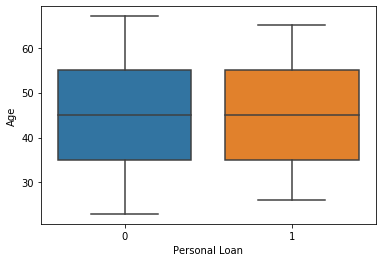

In [27]:
#Age
sns.boxplot(x='Personal Loan',y='Age',data=bank_df);

#### The Age range opting for Personal Loan is less than the Age range not opting for Personal Loan.

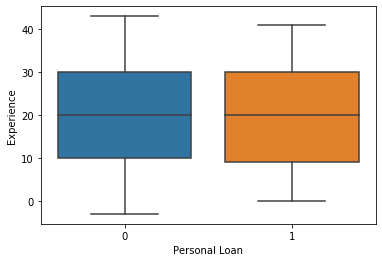

In [28]:
#Experience
sns.boxplot(x='Personal Loan',y='Experience',data=bank_df);

##### The Experience range opting for Personal Loan is less than the Experience range not opting for Personal Loan

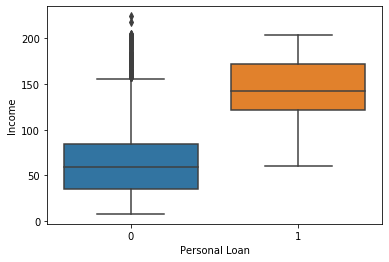

In [29]:
#Income
sns.boxplot(x='Personal Loan',y='Income',data=bank_df);

##### The Income Bracket/Range of Customers opting for Personal loan is higher compared to the Income Bracket/Range of Customers not opting for Personal loan. This analysis can be used to target the next years Campaign for Income Bracket/Range of Customers above $60k. 

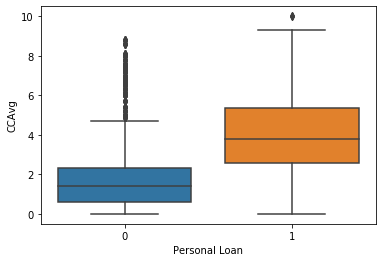

In [30]:
#CCAvg
sns.boxplot(x='Personal Loan',y='CCAvg',data=bank_df);

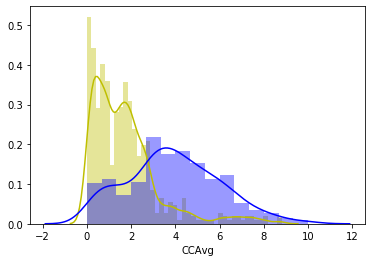

In [31]:
sns.distplot( bank_df[bank_df['Personal Loan'] == 0]['CCAvg'], color = 'y');
sns.distplot( bank_df[bank_df['Personal Loan'] == 1]['CCAvg'], color = 'b');

In [32]:
print('Credit card spending of Non-Loan customers: ',bank_df[bank_df['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', bank_df[bank_df['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


##### Customers having higher credit card average can bee seen in the histogram above. Customer's average credit card spending with a median of 3800 dollar indicates a higher probability of customer to opt for Personal Loan. Customer's average credit card  spending with a median of 1400 dollars is less likely to opt for a Personal Loan. 

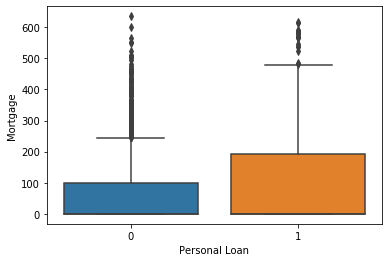

In [33]:
#Mortgage
sns.boxplot(x='Personal Loan',y='Mortgage',data=bank_df);

##### Customers not using Credit Card issued by UniversalBank have higher number of personal loan acceptance

In [34]:
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


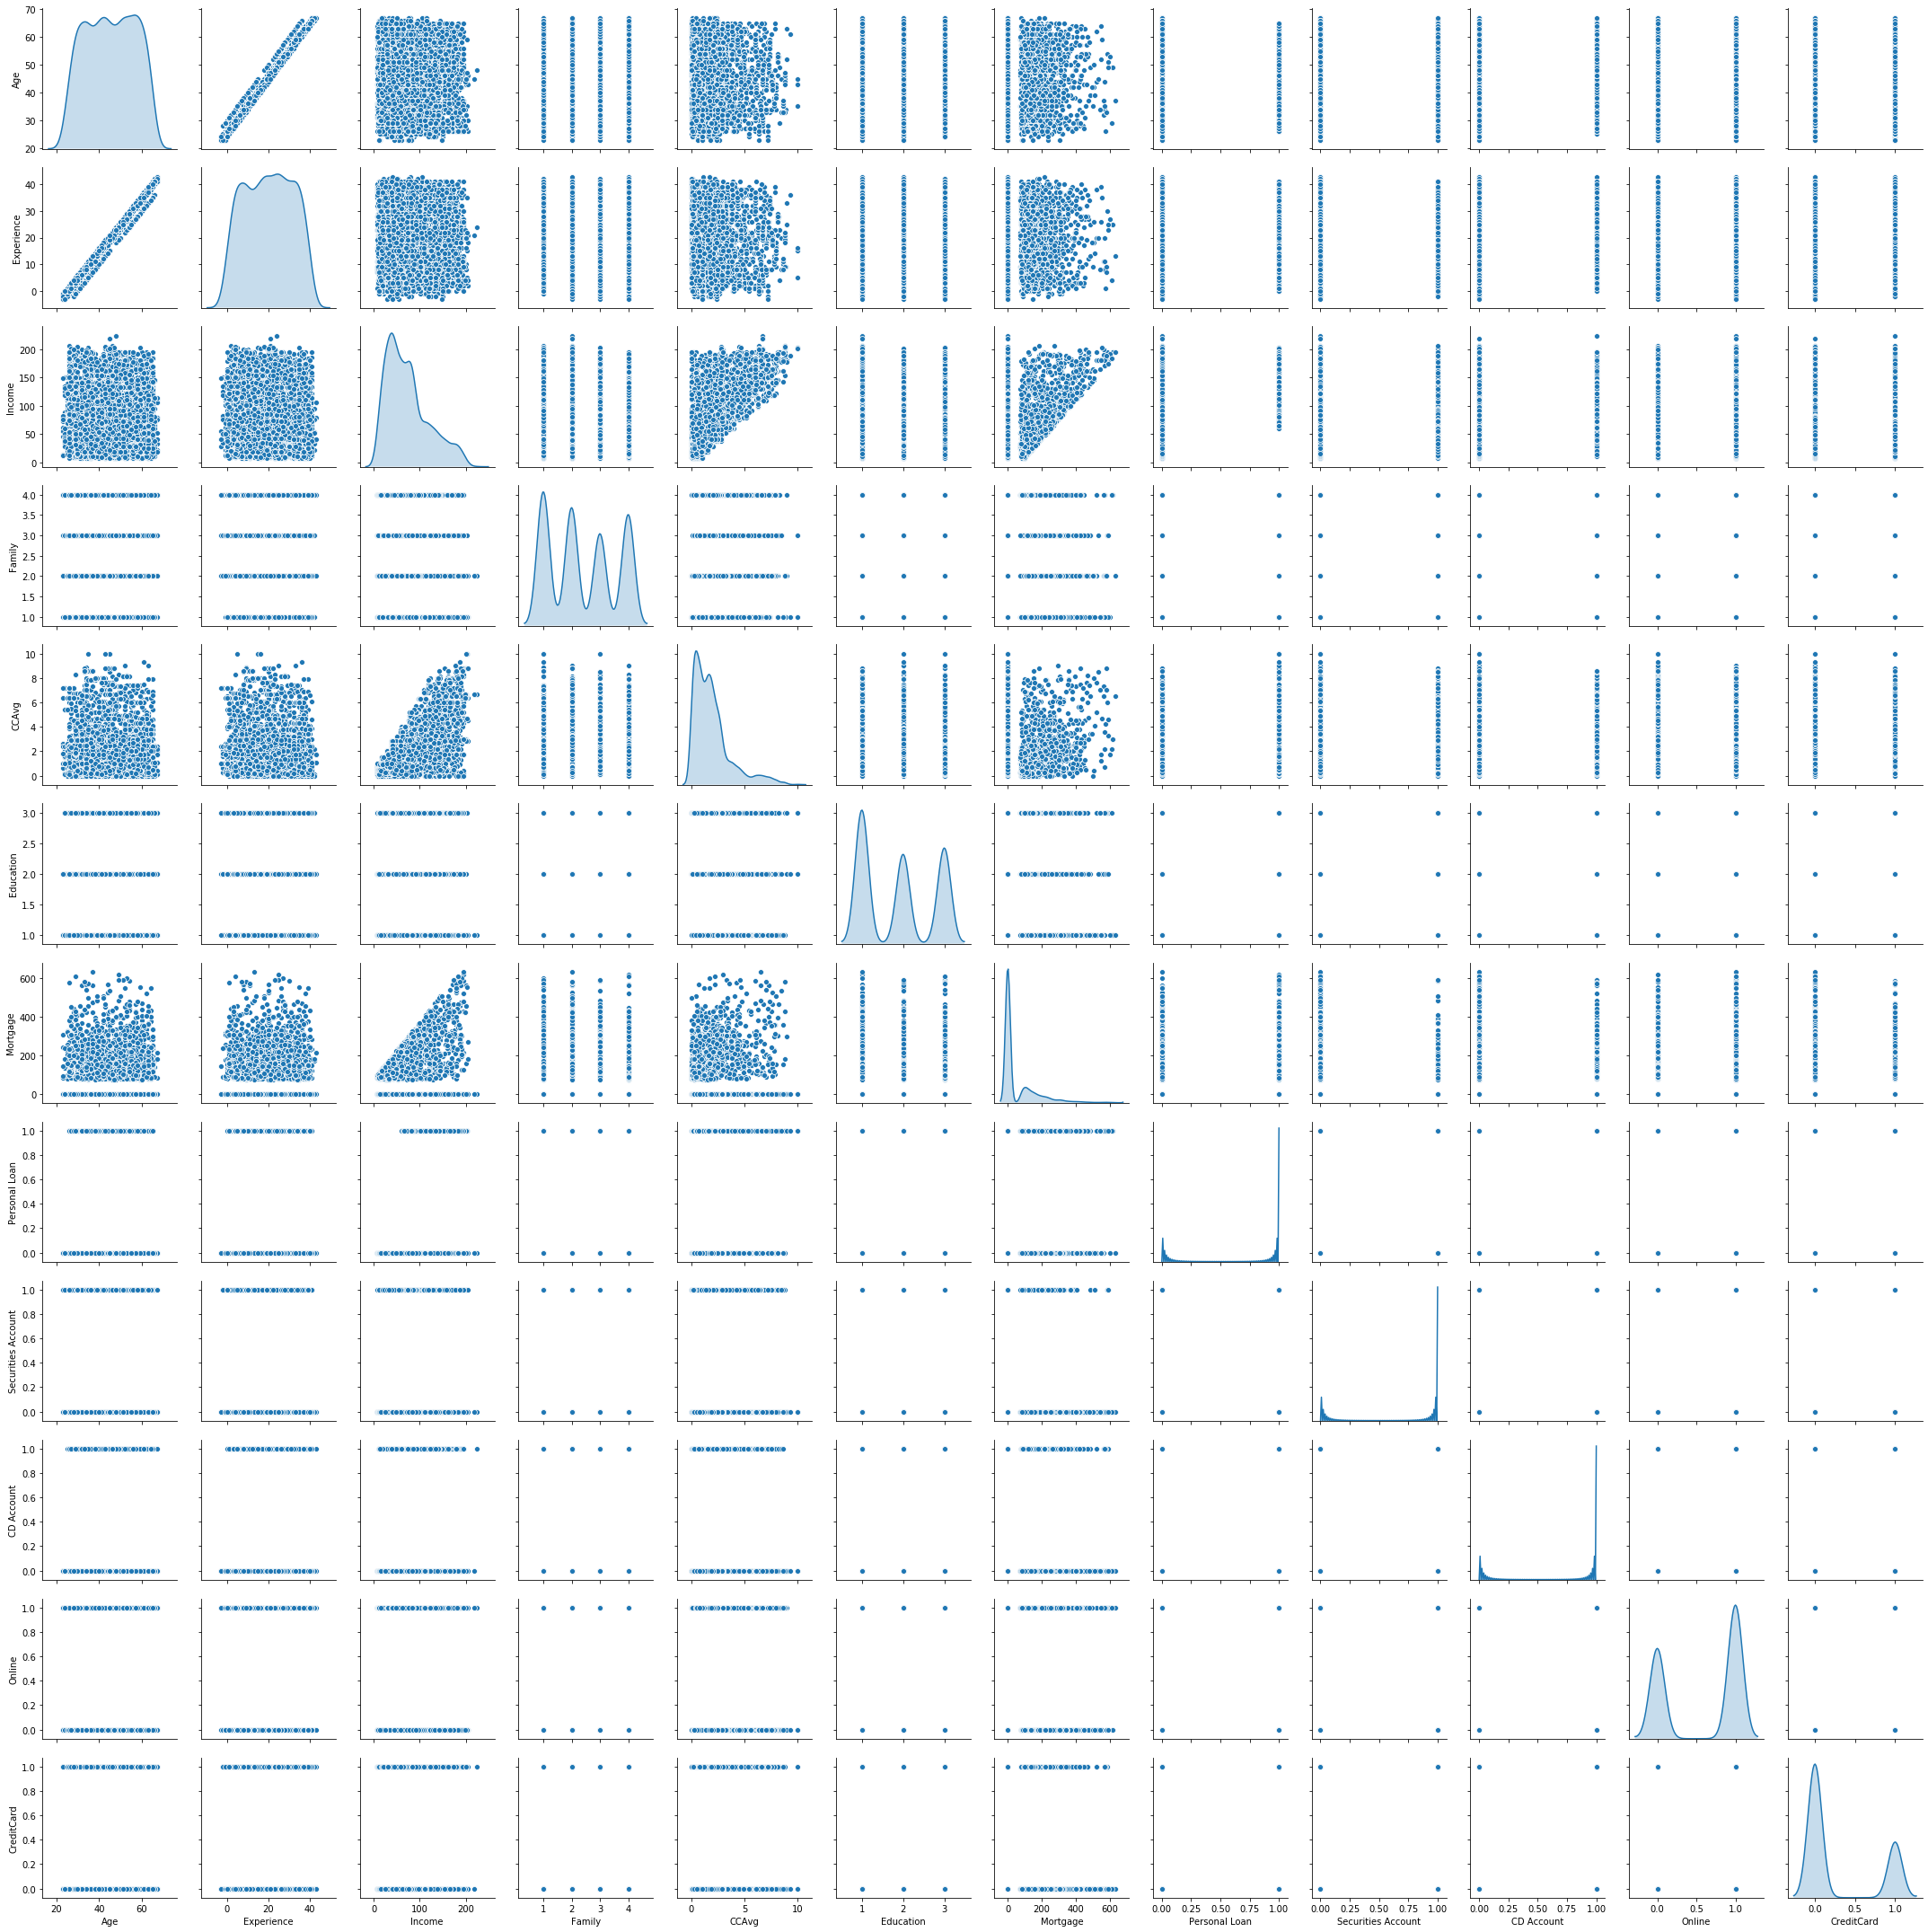

In [35]:
sns.pairplot(bank_df,diag_kind='kde');

In [36]:
bank_df.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


* **Experience** column is normally distributed. Hence we can say that the **mean** is equal to **median**. There are negative values present in the **Experience** column, this suggests that it is a data input error and we know that experience cannot be in negative years. We can replace these values, with 0.
* **Age** column is also normally distributed. The above summary (describe function) shows **mean** is almost equal to **median**
* **Income** is positively skewed, as **mean** > **median**
* **CCAvg** is also a positively skewed variable, as **mean** > **median**
* **Mortgage**  has min, 1st and 2nd quantile value as 0.
* The variables family and education are ordinal variables. The distribution of families is evenly distributes

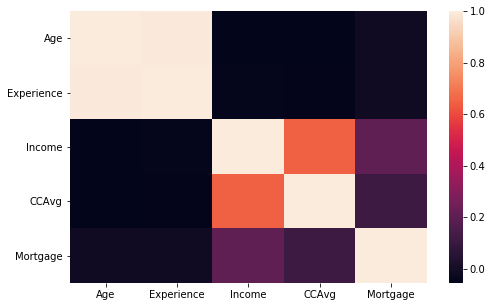

In [37]:
# However we want to see correlation in graphical representation so below is function for that
corr = bank_df.corr();
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(corr);

## 4. Split the data into training and test set in the ratio of 70:30 respectively

In [38]:
X=bank_df.drop('Personal Loan',axis=1)

In [39]:
y=bank_df['Personal Loan']

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=1)

Lets check split of data

In [41]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(bank_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(bank_df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [42]:
#Lets check the Split Ratio before and after Split
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(bank_df.loc[bank_df['Personal Loan'] == 1]), (len(bank_df.loc[bank_df['Personal Loan'] == 1])/len(bank_df.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(bank_df.loc[bank_df['Personal Loan'] == 0]), (len(bank_df.loc[bank_df['Personal Loan'] == 0])/len(bank_df.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



In [43]:
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


## 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans
## 6. Print the confusion matrix for all the above models

### Logistic Regression

In [44]:
# Fit the model on train data set
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test  data set
y_predict = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.406441  0.405044  0.049149  0.651672  0.162392  1.656006  0.000795   

          7         8         9        10  intercept  
0 -0.907028  3.263895 -0.575307 -1.007996  -2.375645  


In [45]:
model_score1 = model.score(X_train, y_train)
print(model_score1)

0.952


In [46]:
model_score2 = model.score(X_test, y_test)
print(model_score2)

0.9453333333333334


### Confusion matrix for Logistic Regression

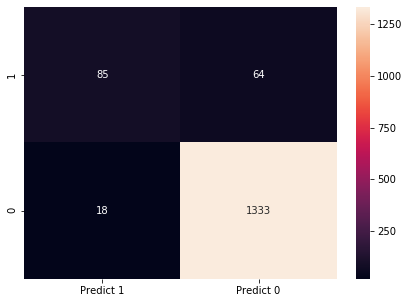

In [47]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d');

In [48]:
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.recall_score(y_test,y_predict))
print(metrics.precision_score(y_test,y_predict))

0.9453333333333334
0.5704697986577181
0.8252427184466019


In [49]:
# Summarise
print('Accuracy of Logistic Regression model on test set: {:.2%}'.format(metrics.accuracy_score(y_test,y_predict)))
print('Misclassification Rate: It is often wrong: {:.2%}'.format(1-(accuracy_score(y_test,y_predict))))
print('Sensitivity/Recall: When its actually yes how often it predicts yes: {:.2%}'.format(metrics.recall_score(y_test,y_predict)))
# print('Specificity/ True Negative Rate : When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
print('Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: {:.2%}'.format(metrics.precision_score(y_test,y_predict)))

Accuracy of Logistic Regression model on test set: 94.53%
Misclassification Rate: It is often wrong: 5.47%
Sensitivity/Recall: When its actually yes how often it predicts yes: 57.05%
Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: 82.52%


### KNN

In [50]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = myList[::2] #list(filter(lambda x: x % 2 != 0, myList))
# print(neighbors)
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


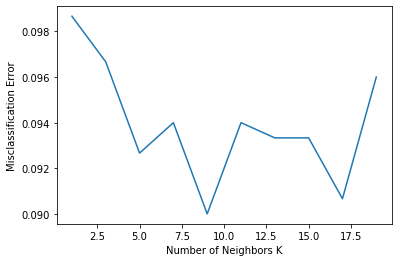

In [51]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [52]:
NNH = KNeighborsClassifier(n_neighbors= optimal_k , weights = 'distance' )
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')

In [53]:
predicted_labels = NNH.predict(X_test)
print(NNH.score(X_test, y_test))

0.9113333333333333


### Confusion matrix for KNN

Confusion Matrix


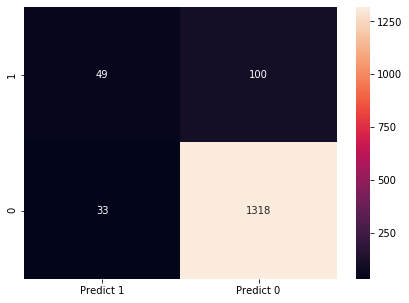

In [54]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d');

In [55]:
print(metrics.accuracy_score(y_test,predicted_labels))
print(metrics.recall_score(y_test,predicted_labels))
print(metrics.precision_score(y_test,predicted_labels))

0.9113333333333333
0.3288590604026846
0.5975609756097561


In [56]:
# Summarise
print('Accuracy of Logistic Regression model on test set: {:.2%}'.format(metrics.accuracy_score(y_test,predicted_labels)))
print('Misclassification Rate: It is often wrong: {:.2%}'.format(1-(accuracy_score(y_test,predicted_labels))))
print('Sensitivity/Recall: When its actually yes how often it predicts yes: {:.2%}'.format(metrics.recall_score(y_test,predicted_labels)))
# print('Specificity/ True Negative Rate : When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
print('Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: {:.2%}'.format(metrics.precision_score(y_test,predicted_labels)))

Accuracy of Logistic Regression model on test set: 91.13%
Misclassification Rate: It is often wrong: 8.87%
Sensitivity/Recall: When its actually yes how often it predicts yes: 32.89%
Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: 59.76%


### Naïve Bayes

In [57]:
bank_model= GaussianNB()
bank_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [58]:
bank_train_predict=bank_model.predict(X_train)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, bank_train_predict)))

Model Accuracy: 0.8900


In [59]:
bank_test_predict=bank_model.predict(X_test)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, bank_test_predict)))

Model Accuracy: 0.8747


### Confusion matrix for Naïve Bayes

Confusion Matrix


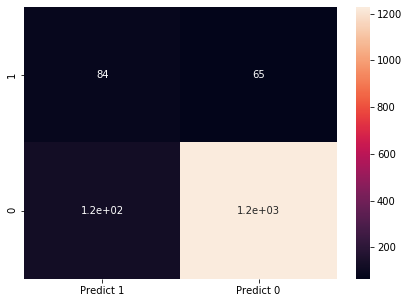

In [60]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, bank_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [61]:
print(metrics.accuracy_score(y_test,bank_test_predict))
print(metrics.recall_score(y_test,bank_test_predict))
print(metrics.precision_score(y_test,bank_test_predict))

0.8746666666666667
0.5637583892617449
0.4057971014492754


In [62]:
# Summarise
print('Accuracy of Logistic Regression model on test set: {:.2%}'.format(metrics.accuracy_score(y_test,bank_test_predict)))
print('Misclassification Rate: It is often wrong: {:.2%}'.format(1-(accuracy_score(y_test,bank_test_predict))))
print('Sensitivity/Recall: When its actually yes how often it predicts yes: {:.2%}'.format(metrics.recall_score(y_test,bank_test_predict)))
# print('Specificity/ True Negative Rate : When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
print('Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: {:.2%}'.format(metrics.precision_score(y_test,bank_test_predict)))

Accuracy of Logistic Regression model on test set: 87.47%
Misclassification Rate: It is often wrong: 12.53%
Sensitivity/Recall: When its actually yes how often it predicts yes: 56.38%
Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: 40.58%


## 7. Give your reasoning on which is the best model in this case and why it performs better?

In [63]:
# Compute ROC curve and area the curve for Logistic Regression
a=metrics.roc_auc_score(y_test, y_predict)
print("Area under the ROC curve for Logistic Regression : %f" % a)

Area under the ROC curve for Logistic Regression : 0.778573


In [64]:
# Compute ROC curve and area the curve for KNN
b=metrics.roc_auc_score(y_test, predicted_labels)
print("Area under the ROC curve KNN : %f" % b)

Area under the ROC curve KNN : 0.652216


In [65]:
# Compute ROC curve and area the curve for Naive Bayes
c=metrics.roc_auc_score(y_test, bank_test_predict)
print("Area under the ROC curve Naive Bayes : %f" % c)

Area under the ROC curve Naive Bayes : 0.736357


Area under curve for model Logistic Regression = 0.778573


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under curve for model KNN = 0.667909
Area under curve for model Naive Bayes = 0.736357


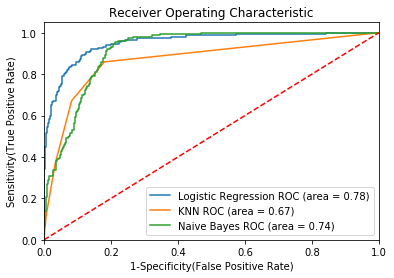

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'KNN',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
}

]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    print("Area under curve for model %s = %f" %(m['label'], auc))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [67]:
print(metrics.classification_report(y_test,y_predict,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.83      0.57      0.67       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



### Below are the Logistic Regression, KNN, Naive Bayes Implementation results:

In [68]:
# Logistic Regression

print('Accuracy of Logistic Regression model on test set: {:.2%}'.format(metrics.accuracy_score(y_test,y_predict)))
print('Misclassification Rate: It is often wrong: {:.2%}'.format(1-(accuracy_score(y_test,y_predict))))
print('Sensitivity/Recall: When its actually yes how often it predicts yes: {:.2%}'.format(metrics.recall_score(y_test,y_predict)))
print('Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: {:.2%}'.format(metrics.precision_score(y_test,y_predict)))
#print("Area under the ROC curve for Logistic Regression : %f" % a)

Accuracy of Logistic Regression model on test set: 94.53%
Misclassification Rate: It is often wrong: 5.47%
Sensitivity/Recall: When its actually yes how often it predicts yes: 57.05%
Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: 82.52%


In [69]:
# KNN

print('Accuracy of Logistic Regression model on test set: {:.2%}'.format(metrics.accuracy_score(y_test,predicted_labels)))
print('Misclassification Rate: It is often wrong: {:.2%}'.format(1-(accuracy_score(y_test,predicted_labels))))
print('Sensitivity/Recall: When its actually yes how often it predicts yes: {:.2%}'.format(metrics.recall_score(y_test,predicted_labels)))
print('Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: {:.2%}'.format(metrics.precision_score(y_test,predicted_labels)))

#print("Area under the ROC curve KNN : %f" % b)

Accuracy of Logistic Regression model on test set: 91.13%
Misclassification Rate: It is often wrong: 8.87%
Sensitivity/Recall: When its actually yes how often it predicts yes: 32.89%
Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: 59.76%


In [70]:
# Naive Bayes

print('Accuracy of Logistic Regression model on test set: {:.2%}'.format(metrics.accuracy_score(y_test,bank_test_predict)))
print('Misclassification Rate: It is often wrong: {:.2%}'.format(1-(accuracy_score(y_test,bank_test_predict))))
print('Sensitivity/Recall: When its actually yes how often it predicts yes: {:.2%}'.format(metrics.recall_score(y_test,bank_test_predict)))
print('Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: {:.2%}'.format(metrics.precision_score(y_test,bank_test_predict)))

#print("Area under the ROC curve Naive Bayes : %f" % c)

Accuracy of Logistic Regression model on test set: 87.47%
Misclassification Rate: It is often wrong: 12.53%
Sensitivity/Recall: When its actually yes how often it predicts yes: 56.38%
Precision/ Positive Predictive Value: When it predicts yes, how often is it correct: 40.58%


### As per the Accuracy and other metrics calculated for the 3 models, Logistic Regression Model has the highest Accuracy of 94.53 %. 
### Hence Logistic Regression is the best model as it performs better than others models from the accuracy & respective findings from Confusion Matrix and ROC/AUC.